In [27]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split,KFold,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
df = pd.read_csv('../data/housing_price.csv')
X = df.drop(columns='price')
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
num_cols = Pipeline([
    ('scl',StandardScaler())
])

cat_cols = Pipeline([
    ('enc',OneHotEncoder())
])

prep = ColumnTransformer([
    ('num',num_cols,['area','bedrooms','stories','parking']),
    ('cat',cat_cols,['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus'])
])

pipeline = Pipeline([
        ('prep',prep),
        ('pca',PCA()),
        ('model',LinearRegression())
    ])

In [25]:
param_grid = {
    'pca__n_components': [2,3,4,5],  # Contoh nilai untuk PCA
    'model__fit_intercept': [True, False],
    'model__positive':[True,False]
}
model = GridSearchCV(pipeline, param_grid, cv=10, scoring='neg_mean_absolute_error')
model.fit(X_train,y_train)
print(f'Train error: {model.score(X_train,y_train)}, Test error: {model.score(X_test,y_test)}')

Train error: -801142.3989587094, Test error: -1017292.0052777724


In [67]:
num_cols = Pipeline([
    ('scl',StandardScaler())
])

cat_cols = Pipeline([
    ('enc',OneHotEncoder())
])

prep = ColumnTransformer([
    ('num',num_cols,['area','bedrooms','stories','parking']),
    ('cat',cat_cols,['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus'])
])

pipeline = Pipeline([
        ('prep',prep),
        ('model',GradientBoostingRegressor())
    ])

param = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.001, 0.01, 0.1],
    'model__max_depth': [3, 4, 5],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__subsample': [0.8, 1.0],
    'model__max_features': ['sqrt', 'log2']
}

grad_model = GridSearchCV(pipeline, param, cv=3, scoring='neg_mean_squared_error',n_jobs=-1,verbose=1)
grad_model.fit(X_train, y_train)
print(f'Train error: {grad_model.score(X_train,y_train)}, Test error: {grad_model.score(X_test,y_test)}')
print(f'{grad_model.best_params_}')

Fitting 3 folds for each of 972 candidates, totalling 2916 fits
Train error: -676776512345.0575, Test error: -2077921513073.1838
{'model__learning_rate': 0.01, 'model__max_depth': 5, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 2, 'model__min_samples_split': 10, 'model__n_estimators': 300, 'model__subsample': 0.8}


Model menghasilkan error yang kecil!

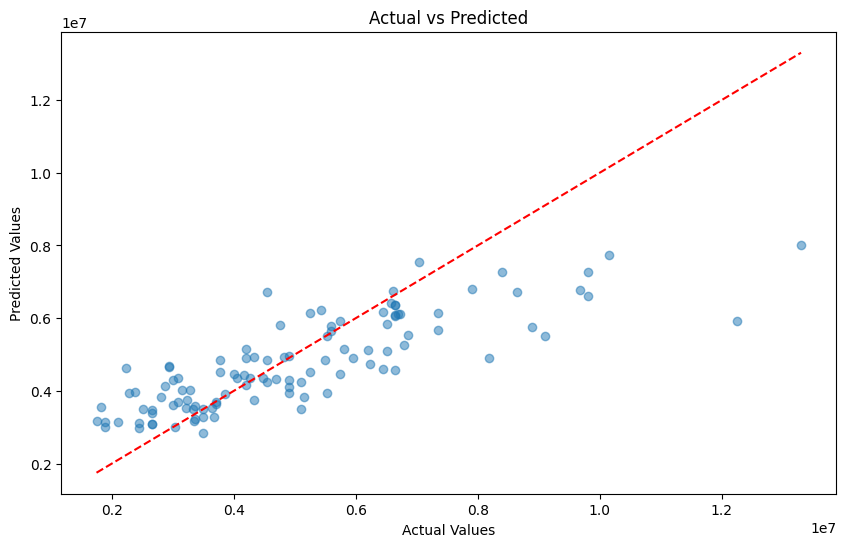

In [68]:
import matplotlib.pyplot as plt

y_pred = grad_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


In [71]:
import joblib

joblib.dump(grad_model,'../models/gradboost_model.pkl')

['../models/gradboost_model.pkl']